<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea Semanal 5

*Roman Ordoñez*

### Consignas
1. Obtener la plantillas de *atenuacion normalizada en frecuencia*. Indicar los valores de $\alpha max$ y de $\alpha min$
2. Obtener la funcion transferencia *normalizada* del prototipo pasa bajo que satisfaga el requerimiento del filtro pasa banda
3. Aplicar el nucleo de transformacion *pasa banda* y obtener la transferencia. Factorizar convenientemente para expresar en SOS
4. Realizar la simulacion numerica en Python. Graficar la respuesta en frecuencia del filtro pasa banda total, y las de las SOS

### Punto 1

<img src="ts5_1.jpg" width="500">

Como se puede ver en el grafico ya normalizado, se tiene una $\alpha max = 0.5 db$ pero para las $\alpha min$ existen 2 valores, 16 dB y 24 dB. En el punto 2 se detalla cual sera la elegida, principalmente para la eleccion del orden del filtro

### Punto 2

<img src="ts5_2.jpg" width="500">

Al quedarnos con la $n_1$ tambien adoptamos su $\alpha min$ que seria 16 dB.

<img src="ts5_3.jpg" width="500">

### Punto 3

<img src="ts5_4.jpg" width="500">

<img src="ts5_6.jpg" width="500">

In [2]:
# Módulos externos

import sympy as sp
from sympy.abc import s

import matplotlib as mpl
import matplotlib.pyplot as plt

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi

fig_font_size = 11

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

import numpy as np
import scipy.signal as sig
from IPython.display import display, Markdown

from pytc2.sistemas_lineales import analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

# coeficientes de la transferencia de primer orden T1
T2_num = np.array([0.716])
T2_den = np.array([1,1.253, 1.535, 0.716])

# Q de la transformación
Q_bp = 5

# núcleo LP-BP
num_pbanda, den_pbanda = sig.lp2bp(T2_num, T2_den, bw = 1/Q_bp)

print_subtitle('Prototipo de tercer orden')

print_latex(a_equal_b_latex_s('$ T_{lp}(s)', sp.latex( 0.716/(s**3 + 1.253 * s**2 + s * 1.535 + 0.716) )))

print_subtitle('Pasabanda obtenido (coeficientes de los polinomios)')

print(num_pbanda)
print(den_pbanda)

print_subtitle('Pasabanda visto como cociente de polinomios')

# forma un poco más clara
#pretty_print_lti(num_pbanda, den_pbanda)
print_latex(a_equal_b_latex_s('T_{bp}(s)', pretty_print_lti(num_pbanda, den_pbanda, displaystr=False)))

# esta es la que va

print_subtitle('Pasabanda factorizado en secciones bicuadráticas (SOS)')

sos_pbanda = tf2sos_analog(num_pbanda, den_pbanda)

# la visualizamos de algunas formas, la tradicional
#pretty_print_SOS(sos_pbanda)
print_latex(a_equal_b_latex_s('T_{bp}(s)', pretty_print_SOS(sos_pbanda, displaystr=False)))


print_subtitle('Pasabanda factorizado en SOS parametrizadas $\omega_0$ y $Q$')

#pretty_print_SOS(sos_pbanda, mode='omegayq')
print_latex(a_equal_b_latex_s('T_{bp}(s)', pretty_print_SOS(sos_pbanda, mode='omegayq', displaystr=False)))



#### Prototipo de tercer orden

<IPython.core.display.Math object>

#### Pasabanda obtenido (coeficientes de los polinomios)

[0.005728 0.       0.       0.      ]
[1.       0.2506   3.0614   0.506928 3.0614   0.2506   1.      ]


#### Pasabanda visto como cociente de polinomios

<IPython.core.display.Math object>

#### Pasabanda factorizado en secciones bicuadráticas (SOS)

<IPython.core.display.Math object>

#### Pasabanda factorizado en SOS parametrizadas $\omega_0$ y $Q$

<IPython.core.display.Math object>

### Punto 4

A continuacion se desarrollara en primer lugar, los graficos correspondientes a la transferencia $T_{bp}(s)$ en forma completa. Luego, se muestran los graficos de las tres bicuadraticas que lo componen

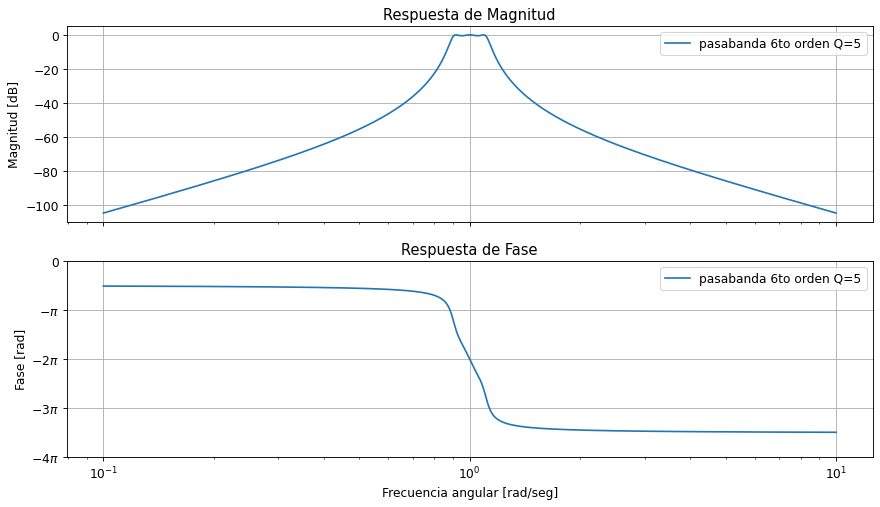

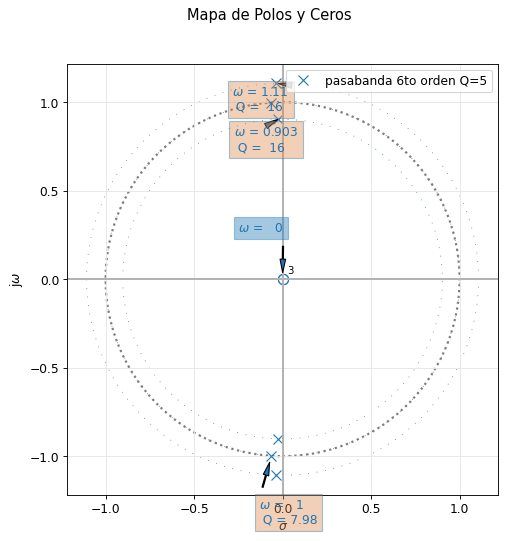

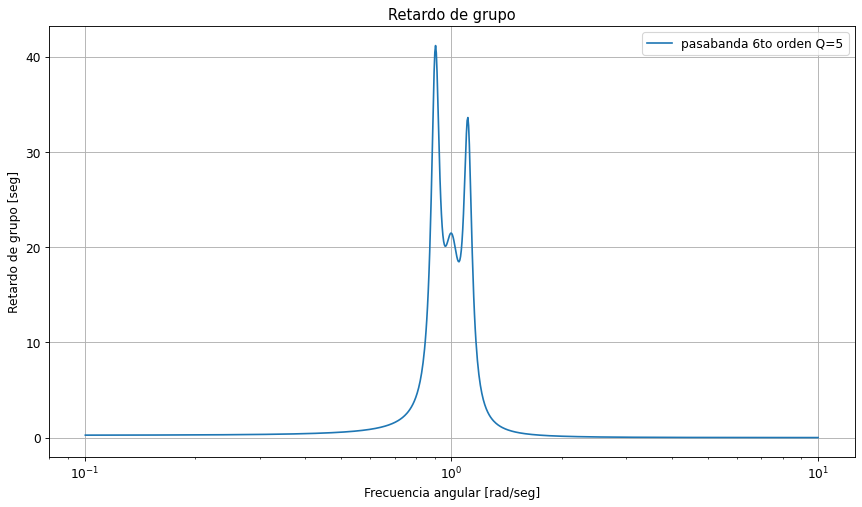

In [3]:
T1_bp =  sig.TransferFunction( num_pbanda, den_pbanda )

# el caracter "_" descarta la salida de la función
_ = analyze_sys(T1_bp, sys_name='pasabanda 6to orden Q={:d}'.format(Q_bp))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[1,
  [<Axes: title={'center': 'Respuesta de Magnitud'}, ylabel='Magnitud [dB]'>,
   <Axes: title={'center': 'Respuesta de Fase'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Fase [rad]'>]],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 [3, []],
 [4,
  <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>]]

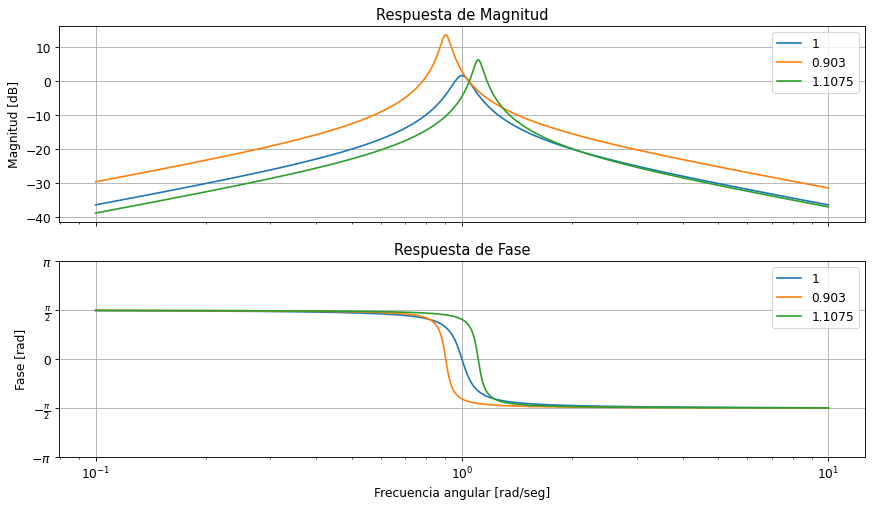

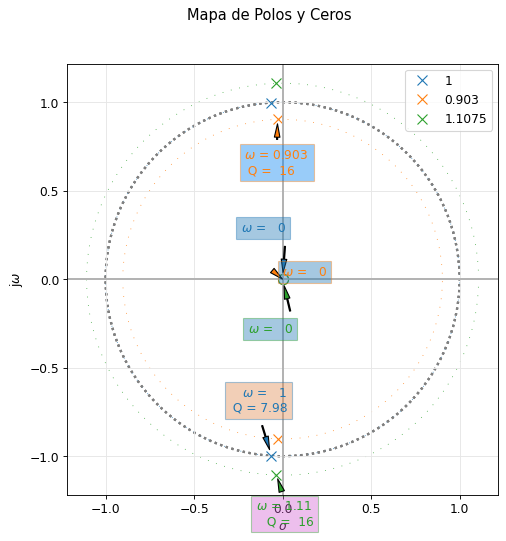

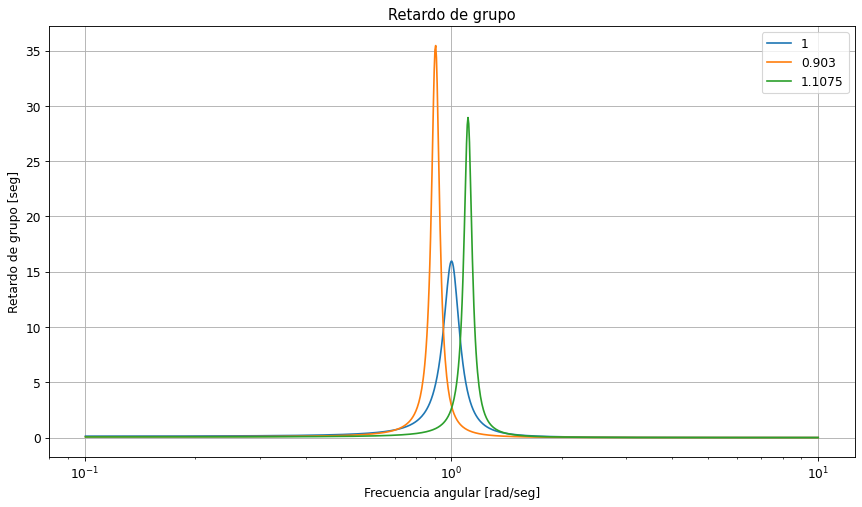

In [4]:
all_sos = []
all_values = [1,0.903,1.1075]
all_q = [7.978, 16.05,16.05]
all_k = [1.207,4.769,2.045]
i = 0

for ii in all_values:
    
    wo = ii
    qq = all_q[i] 
    k = all_k[i]
    i = i+1
    num = np.array([k*(wo/qq),0]) 
    den = np.array([1, wo/qq, wo**2])
    
    pretty_print_bicuad_omegayq(num,den)

    mi_sos = sig.TransferFunction(num,den)

    all_sos += [mi_sos]
    
plt.close('all')
analyze_sys(all_sos, sys_name=all_values)

